<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cargar base de datos sinteticas
#https://drive.google.com/file/d/17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB/view?usp=sharing
#id del archivo: 17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB

FILEID = "17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-08-04 00:49:32--  https://docs.google.com/uc?export=download&confirm=&id=17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB
Resolving docs.google.com (docs.google.com)... 172.217.204.100, 172.217.204.102, 172.217.204.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-0g-docs.googleusercontent.com/docs/securesc/ts4iajb9i6u4qsrtmkpieg5abcqniupa/6vpm7nvd5ffk4900uj6pms91v00vv4at/1596502125000/11146100322577758036/15690922724346563814Z/17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB?e=download [following]
--2020-08-04 00:49:32--  https://doc-0g-0g-docs.googleusercontent.com/docs/securesc/ts4iajb9i6u4qsrtmkpieg5abcqniupa/6vpm7nvd5ffk4900uj6pms91v00vv4at/1596502125000/11146100322577758036/15690922724346563814Z/17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB?e=download
Resolving doc-0g-0g-docs.googleusercontent.com (doc-0g-0g-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connectin

In [2]:
import os
import sys
Path='/content/CKAPRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

In [3]:
!pip install tf-nightly
import numpy as np
import scipy.io as sio
from CKA_PRI import *
import tensorflow as tf
from joblib import dump,load
from sklearn import  datasets
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import accuracy_score,jaccard_score

     |████████████████████████████████| 323.8MB 46kB/s 
     |████████████████████████████████| 6.7MB 41.0MB/s 
     |████████████████████████████████| 460kB 31.8MB/s 


# **Sinteticas**

**Prueba con Happy**
- Se realiza una prueba en happy con la base de datos fragmentados para probar el funcionamiento de la clase


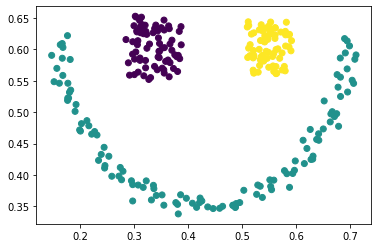

In [4]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
plt.scatter(happy[:,0],happy[:,1],c=labels_happy)

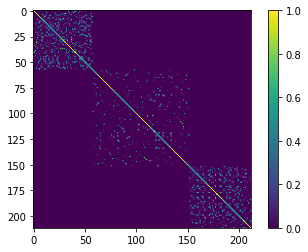

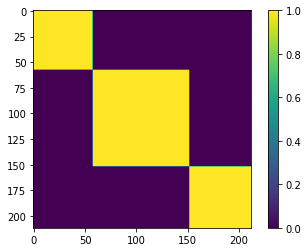

(212, 212)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    happy, labels_happy, test_size=0.2, stratify=labels_happy)
#ejemplo cálculo kernels con tfp
ind = np.argsort(y_train)
Xtrain = X_train[ind]
ytrain = y_train[ind]
xi = tf.convert_to_tensor(Xtrain.reshape(Xtrain.shape[0],-1),dtype=tf.float32)
yi = tf.convert_to_tensor(ytrain.reshape(-1,1),dtype=tf.float32)
#kernel gaussiano tfp
scalar_kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=0.01)
scalar_kernely = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=1e-13)
K = scalar_kernel.matrix(xi, xi)
plt.imshow(K.numpy())
plt.colorbar()
plt.show()

Ky = scalar_kernely.matrix(yi, yi)
plt.imshow(Ky.numpy())
plt.colorbar()
plt.show()
print(K.shape)

Epoch 1/100
4/4 [==============================] - 1s 313ms/step - loss: 1.2352
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0827
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0381
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0370
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0083
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0238
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9913
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0310
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9651
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9920
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9730
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9839
Epoch 13/100
4/4 [==============================] - 0s 6ms/

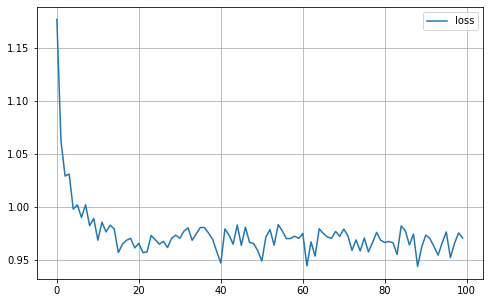

In [6]:
p = PRICKA(K=3,sigmay=0.03)
p.fit(Xtrain,ytrain/1.0)
labels_pre_ = p.predict(X_test)

Ari: 1.0 y accuracy: 1.0


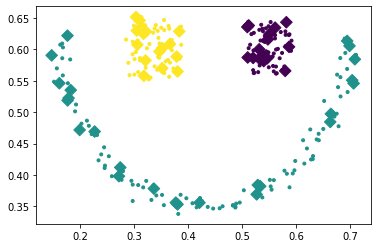

In [7]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=p.labels_, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_, marker='D',s=68)
Rari_=adjusted_rand_score(y_test,labels_pre_)
Racc_=accuracy_score(y_test,labels_pre_)
print('Ari: '+str(Rari_)+' y'+' accuracy: '+str(Racc_))

**Moons**
- dado que con la base de datos happy se logro comprobar el funcionamiento de la clase, con moons no se partiran los datos

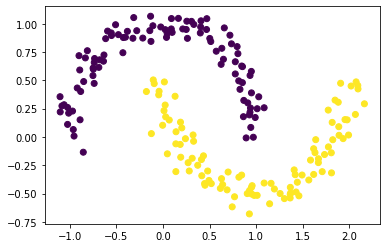

In [14]:
moons,labels_moons = datasets.make_moons(n_samples=200, noise=.085)
plt.scatter(moons[:,0],moons[:,1],c=labels_moons)
Xtrain=moons
ytrain=labels_moons

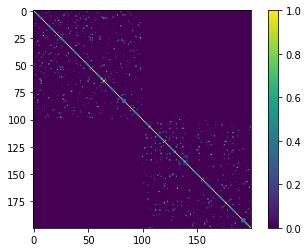

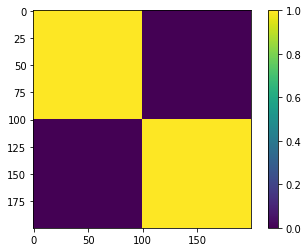

(200, 200)


In [15]:
ind = np.argsort(ytrain)
Xtrain = Xtrain[ind]
ytrain = ytrain[ind]
xi = tf.convert_to_tensor(Xtrain.reshape(Xtrain.shape[0],-1),dtype=tf.float32)
yi = tf.convert_to_tensor(ytrain.reshape(-1,1),dtype=tf.float32)
#kernel gaussiano tfp
scalar_kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=0.05)
scalar_kernely = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=1e-13)
K = scalar_kernel.matrix(xi, xi)
plt.imshow(K.numpy())
plt.colorbar()
plt.show()

Ky = scalar_kernely.matrix(yi, yi)
plt.imshow(Ky.numpy())
plt.colorbar()
plt.show()
print(K.shape)

Epoch 1/100
4/4 [==============================] - 1s 277ms/step - loss: 1.3232
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.2396
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1707
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1808
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1461
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1719
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1803
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1756
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1550
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1477
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1582
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1756
Epoch 13/100
4/4 [==============================] - 0s 3ms/

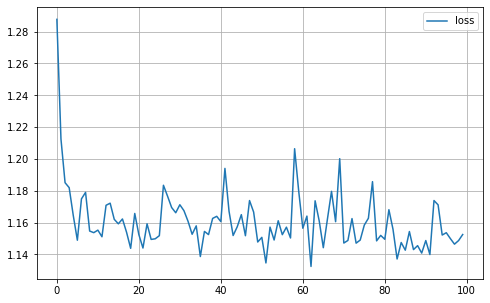

[array([0.]), array([1.])]
[0.]
[array([0.]), array([1.])]
[1.]


In [16]:
p = PRICKA(K=2,sigmay=0.8,lambda_=0.4)
p.fit(Xtrain,ytrain/1.0)
labels_pre_ = p.predict(Xtrain)

Ari: 0.2880452349014981 y accuracy: 0.77


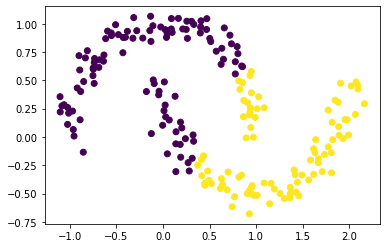

In [17]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=p.labels_)
Rari_=adjusted_rand_score(ytrain,p.labels_)
Racc_=accuracy_score(ytrain,p.labels_)
print('Ari: '+str(Rari_)+' y'+' accuracy: '+str(Racc_))

# **Reales**
- Para esta seccion se prueba con la base de datos de MNIST, debido al tamaño de la base de datos la misma es fragmentada  y se toman 2000 imagenes con sus respectivas etiquetas

11493376/11490434 [==============================] - 0s 0us/step


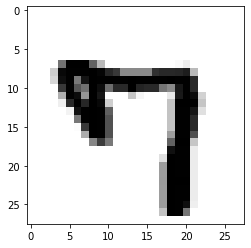

In [18]:
(Xtrain, ytrain), (Xtest, ytest) = tf.keras.datasets.mnist.load_data()
Xtrain, _, ytrain, _= train_test_split(Xtrain,ytrain, stratify=ytrain,train_size=2000) # 
Xtrain = Xtrain/255.0 #obligar a flotante normalizado 0 a 1
Xtest = Xtest/255.0
ytrain = ytrain/1.0
ytest = ytest/1.0
plt.imshow(Xtrain[0],cmap='binary')

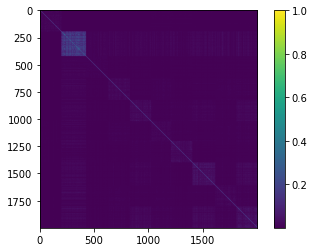

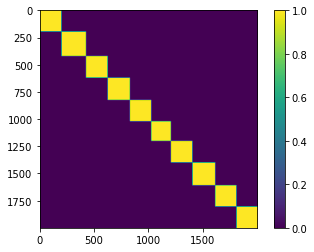

In [19]:
#ejemplo cálculo kernels con tfp
Xtrain = Xtrain.reshape(Xtrain.shape[0],-1)
Xtest = Xtest.reshape(Xtest.shape[0],-1)
ind = np.argsort(ytrain)
Xtrain = Xtrain[ind]
ytrain = ytrain[ind]
xi = tf.convert_to_tensor(Xtrain.reshape(Xtrain.shape[0],-1),dtype=tf.float32)
yi = tf.convert_to_tensor(ytrain.reshape(-1,1),dtype=tf.float32)
#kernel gaussiano tfp
scalar_kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=3)
scalar_kernely = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=1e-13)
K = scalar_kernel.matrix(xi, xi)
plt.imshow(K.numpy())
plt.colorbar()
plt.show()
Ky = scalar_kernely.matrix(yi, yi)
plt.imshow(Ky.numpy())
plt.colorbar()
plt.show()

Epoch 1/100
32/32 [==============================] - 1s 32ms/step - loss: 1.6289
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4957
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4747
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4685
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4694
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4709
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4686
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4498
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4671
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4567
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4531
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4572
Epoch 13/100
32/32 [================

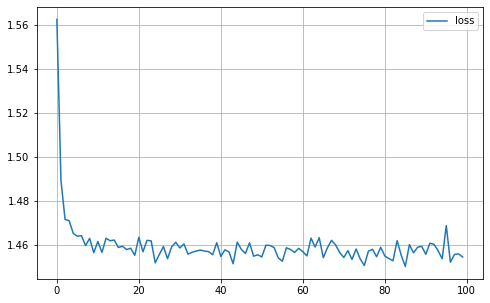

PRICKA(D=150, K=10, activation='softmax', batch_size=64, epochs=100,
       lambda_=0.5, sigmax=1, sigmay=10)

In [20]:
p = PRICKA(K=10,D=150,sigmay=10,lambda_=0.5)
p.fit(Xtrain,ytrain)


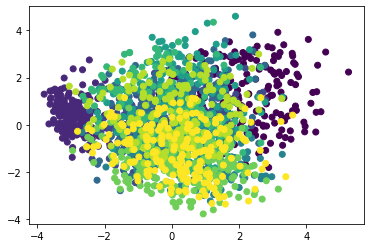

In [21]:
K=p.Kc
red = PCA(n_components=2)
zr = red.fit_transform(K)
plt.scatter(zr[:,0],zr[:,1],c=ytrain)
plt.show()

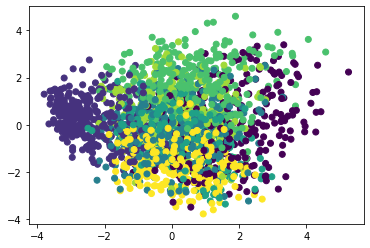

In [22]:
plt.scatter(zr[:,0],zr[:,1],c=p.labels_)

## **Busqueda mejores parametros**
### **Sinteticas**

In [5]:
n_clusters=3
steps =[[('rep', PRICKA())]]
parameters =[ {'rep__lambda_':[0.1,0.5,0.9],'rep__D':[50,150],'rep__sigmay':[0.03,0.2,1,10],'rep__K':[n_clusters]}]

In [ ]:

for i in range(len(steps)):
  meth_name = ['CKAPRI']
  name='/content/CKAPRI/happy' + str(meth_name[i]) + '.joblib'
  Niter = 10 #numero particiones
  acc =np.zeros(Niter)#arreglo para guardar acierto
  ari=np.zeros(Niter)
  jacc=np.zeros(Niter)
  puri=np.zeros(Niter)
  Nc = len(np.unique(labels_happy))
  best_parameters= []#mejor metodo por iteracion

  for j in range(Niter):
    print('it %d/%d'%(j+1,Niter))
    ## Accuracy
    X_train, X_test, y_train, y_test = train_test_split(happy,labels_happy,test_size=0.2, stratify=labels_happy)
    y_train=y_train/1.0
    grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=3,verbose=1,scoring='accuracy',n_jobs=-1)
    #generar mejor modelo
    grid_search.fit(happy,labels_happy)
    #estimar salida conjunto de test
    y_pred = grid_search.best_estimator_.predict(happy)
    #guardar mejor modelo
    best_parameters.append(grid_search.best_params_)
    #guardar acierto
    acc[j] = 100*accuracy_score(labels_happy,y_pred)
    ari[j]=100*adjusted_rand_score(labels_happy,y_pred)
    jacc[j]=100*jaccard_score(labels_happy,y_pred,average='weighted')
    puri[j]=100*purity_score(labels_happy,y_pred)
    #estimar matriz de confusion
    print('it %d/%d'%(j+1,Niter))
    print(grid_search.best_params_)
    print('acc:',acc[j])
    print('ari:',ari[j])
    #print('confusionmatrix \n',cmc[j])
    savedata = {
      'ari':ari,
      'acc':acc,
      'jacc':jacc,
      'puri':puri,
      'best_parameters':best_parameters,
        } 
    dump(savedata,name)

it 1/10
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


**Moons**

In [ ]:
n_clusters=2
steps =[[('rep', PRICKA())]]
parameters =[ {'rep__lambda_':[0.1,0.5,0.9],'rep__D':[50,150],'rep__sigmay':[0.03,0.2,1,10],'rep__K':[n_clusters]}]

In [ ]:
for i in range(len(steps)):
  meth_name = ['CKAPRI']
  name='/content/CKAPRI/happy' + str(meth_name[i]) + '.joblib'
  Niter = 10 #numero particiones
  acc =np.zeros(Niter)#arreglo para guardar acierto
  ari=np.zeros(Niter)
  jacc=np.zeros(Niter)
  puri=np.zeros(Niter)
  Nc = len(np.unique(labels_happy))
  best_parameters= []#mejor metodo por iteracion

  for j in range(Niter):
    print('it %d/%d'%(j+1,Niter))
    ## Accuracy
    X_train, X_test, y_train, y_test = train_test_split(moons,labels_moons,test_size=0.2, stratify=labels_moons)
    y_train=y_train/1.0
    grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=3,verbose=1,scoring='accuracy',n_jobs=-1)
    #generar mejor modelo
    grid_search.fit(moons,labels_moons)
    #estimar salida conjunto de test
    y_pred = grid_search.best_estimator_.predict(moons)
    #guardar mejor modelo
    best_parameters.append(grid_search.best_params_)
    #guardar acierto
    acc[j] = 100*accuracy_score(labels_moons,y_pred)
    ari[j]=100*adjusted_rand_score(labels_moons,y_pred)
    jacc[j]=100*jaccard_score(labels_moons,y_pred,average='weighted')
    puri[j]=100*purity_score(labels_moons,y_pred)
    #estimar matriz de confusion
    print('it %d/%d'%(j+1,Niter))
    print(grid_search.best_params_)
    print('acc:',acc[j])
    print('ari:',ari[j])
    #print('confusionmatrix \n',cmc[j])
    savedata = {
      'ari':ari,
      'acc':acc,
      'jacc':jacc,
      'puri':puri,
      'best_parameters':best_parameters,
        } 
    dump(savedata,name)